In [1]:
# Import requierment libarary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import copy
from copy import deepcopy
from copy import copy
!pip install geopy
from geopy.geocoders import Nominatim
import plotly.graph_objects as go
!pip install geopandas
import geopandas as gpd
!pip install pycountry-convert
import pycountry
import pycountry_convert as pc
from plotly.subplots import make_subplots
!pip install folium
import folium
from folium import plugins

In [2]:
# Import data
data = pd.read_csv('eighteen_nineteen_university_datasets.csv' , encoding = 'unicode_escape')
data

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                    -            > 1000                  -   
996             17                  353               716                296   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995          > 1000               > 1000       464       673   69.8  
996             798                  966    > 1000    > 1000   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[1000 rows x 12 columns]

In [3]:
df = pd.DataFrame(data)
df
df.describe()

World Rank  National Rank        Score
count  1000.000000     1000.00000  1000.000000
mean    500.500000       40.02300    75.034300
std     288.819436       49.22871     4.670858
min       1.000000        1.00000    69.800000
25%     250.750000        6.00000    71.500000
50%     500.500000       21.00000    73.750000
75%     750.250000       51.00000    77.300000
max    1000.000000      213.00000   100.000000

1.Cleaning Dataset

In [4]:
# Replace values equal to'-' with NAN
df1 = df.replace('-', np.nan)

# Replace missing value
df2 = df1.replace('> 1000', 1001)

In [5]:
df2

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                  NaN              1001                NaN   
996             17                  353               716                296   
997             56                  NaN              1001                NaN   
998             35                  NaN              1001                NaN   
999            108                  NaN               869                NaN   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995            1001                 1001       464       673   69.8  
996             798                  966      1001      1001   69.8  
997            1001                 1001       811       673   69.8  
998             881                 1001      1001       898   69.8  
999             923                  904       889      1001   69.8  

[1000 rows x 12 columns]

In [6]:
# Data profilling
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  403 non-null    object 
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    269 non-null    object 
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


In [7]:
# Rename columns to remove hidden characters

df2.rename(columns={'World Rank': 'World_Rank'}, inplace=True)
df2.rename(columns={'National Rank': 'National_Rank'}, inplace=True)
df2.rename(columns={'Alumni Employment': 'Alumni_Employment'}, inplace=True)
df2.rename(columns={'Research Output': 'Research_Output'}, inplace=True)
df2.rename(columns={'Quality Publications': 'Quality_Publications'}, inplace=True)
df2.columns.values[4] = 'Quality_of_Education'
df2.columns.values[6] = 'Quality_of_Faculty'

In [8]:
df2

World_Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National_Rank Quality_of_Education Alumni_Employment Quality_of_Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                  NaN              1001                NaN   
996             17                  353               716                296   
997             56                  NaN              1001                NaN   
998             35                  NaN              1001                NaN   
999            108                  NaN               869                NaN   

    Research_Output Quality_Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995            1001                 1001       464       673   69.8  
996             798                  966      1001      1001   69.8  
997            1001                 1001       811       673   69.8  
998             881                 1001      1001       898   69.8  
999             923                  904       889      1001   69.8  

[1000 rows x 12 columns]

In [9]:
# Identification of missing values

df2.isnull().sum()

World_Rank                0
Institution               0
Location                  0
National_Rank             0
Quality_of_Education    597
Alumni_Employment         0
Quality_of_Faculty      731
Research_Output           0
Quality_Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

In [10]:
# Delete two columns Quality of Education and Quality of Faculty

df3 = df2.drop(columns = ["Quality_of_Education"])
df4 = df3.drop(columns = ["Quality_of_Faculty"])

In [11]:
df4

World_Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National_Rank Alumni_Employment Research_Output Quality_Publications  \
0                1                 1               1                    1   
1                2                 3              10                    4   
2                3                11              30                   15   
3                1                19              12                    8   
4                2                25               9                    5   
..             ...               ...             ...                  ...   
995              3              1001            1001                 1001   
996             17               716             798                  966   
997             56              1001            1001                 1001   
998             35              1001             881                 1001   
999            108               869             923                  904   

    Influence Citations  Score  
0           1         1  100.0  
1           3         2   96.7  
2           2         6   95.1  
3           6        19   94.0  
4           7         4   93.2  
..        ...       ...    ...  
995       464       673   69.8  
996      1001      1001   69.8  
997       811       673   69.8  
998      1001       898   69.8  
999       889      1001   69.8  

[1000 rows x 10 columns]

In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National_Rank         1000 non-null   int64  
 4   Alumni_Employment     1000 non-null   object 
 5   Research_Output       1000 non-null   object 
 6   Quality_Publications  1000 non-null   object 
 7   Influence             1000 non-null   object 
 8   Citations             1000 non-null   object 
 9   Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 78.3+ KB


In [13]:
# convert data

selected_columns = ['Alumni_Employment'
                    , 'Research_Output', 'Quality_Publications','Influence','Citations']
df4[selected_columns] = df4[selected_columns].apply(pd.to_numeric)



In [14]:
# Separate object and float columns and describe both of them
df4_num = df4.select_dtypes(['float64'])
df4_obj = df4.select_dtypes(['object'])
df4_int = df4.select_dtypes(['int64'])

In [15]:
df4_num.describe()     # Score=target

Score
count  1000.000000
mean     75.034300
std       4.670858
min      69.800000
25%      71.500000
50%      73.750000
75%      77.300000
max     100.000000

In [16]:
df4_obj.describe()

Institution Location
count                 1000     1000
unique                1000       61
top     Harvard University      USA
freq                     1      213

In [17]:
df4_int.describe()

World_Rank  National_Rank  Alumni_Employment  Research_Output  \
count  1000.000000     1000.00000        1000.000000      1000.000000   
mean    500.500000       40.02300         726.528000       508.454000   
std     288.819436       49.22871         343.686144       300.080433   
min       1.000000        1.00000           1.000000         1.000000   
25%     250.750000        6.00000         425.750000       250.750000   
50%     500.500000       21.00000        1001.000000       500.500000   
75%     750.250000       51.00000        1001.000000       754.250000   
max    1000.000000      213.00000        1001.000000      1001.000000   

       Quality_Publications    Influence    Citations  
count           1000.000000  1000.000000  1000.000000  
mean             503.003000   529.156000   501.159000  
std              292.854863   322.419239   308.874517  
min                1.000000     1.000000     1.000000  
25%              250.750000   250.750000   240.000000  
50%              500.500000   502.500000   460.000000  
75%              750.250000   814.750000   673.000000  
max             1001.000000  1001.000000  1001.000000

In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National_Rank         1000 non-null   int64  
 4   Alumni_Employment     1000 non-null   int64  
 5   Research_Output       1000 non-null   int64  
 6   Quality_Publications  1000 non-null   int64  
 7   Influence             1000 non-null   int64  
 8   Citations             1000 non-null   int64  
 9   Score                 1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


In [19]:
# add new column for continent

def get_continent_name(country_name):
    country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    return pc.convert_continent_code_to_continent_name(continent_code)

df4['Continent'] = df4['Location'].apply(get_continent_name)


C:\Users\iliya\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
C:\Users\iliya\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [20]:
df4

World_Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National_Rank  Alumni_Employment  Research_Output  Quality_Publications  \
0                1                  1                1                     1   
1                2                  3               10                     4   
2                3                 11               30                    15   
3                1                 19               12                     8   
4                2                 25                9                     5   
..             ...                ...              ...                   ...   
995              3               1001             1001                  1001   
996             17                716              798                   966   
997             56               1001             1001                  1001   
998             35               1001              881                  1001   
999            108                869              923                   904   

     Influence  Citations  Score      Continent  
0            1          1  100.0  North America  
1            3          2   96.7  North America  
2            2          6   95.1  North America  
3            6         19   94.0         Europe  
4            7          4   93.2         Europe  
..         ...        ...    ...            ...  
995        464        673   69.8           Asia  
996       1001       1001   69.8           Asia  
997        811        673   69.8           Asia  
998       1001        898   69.8           Asia  
999        889       1001   69.8           Asia  

[1000 rows x 11 columns]

In [21]:
# Add latitude and longitude columns

geolocator = Nominatim(user_agent="Yasna")

df4['Location'] = df4['Location'].apply(geolocator.geocode)  # Get geographic coordinates
df4['Latitude'] = df4['Location'].apply(lambda loc: loc.latitude if loc else None)  # Latitude extraction
df4['Longitude'] = df4['Location'].apply(lambda loc: loc.longitude if loc else None)  # Longitude extraction


In [22]:
df4

World_Rank                            Institution  \
0             1                     Harvard University   
1             2                    Stanford University   
2             3  Massachusetts Institute of Technology   
3             4                University of Cambridge   
4             5                   University of Oxford   
..          ...                                    ...   
995         996                    Aga Khan University   
996         997                 University of Calcutta   
997         998                       K?chi University   
998         999               Soonchunhyang University   
999        1000              Capital Normal University   

                                              Location  National_Rank  \
0           (United States, (39.7837304, -100.445882))              1   
1           (United States, (39.7837304, -100.445882))              2   
2           (United States, (39.7837304, -100.445882))              3   
3           (United Kingdom, (54.7023545, -3.2765753))              1   
4           (United Kingdom, (54.7023545, -3.2765753))              2   
..                                                 ...            ...   
995                 (پاکستان, (30.3308401, 71.247499))              3   
996                  (India, (22.3511148, 78.6677428))             17   
997                    (日本, (36.5748441, 139.2394179))             56   
998                   (대한민국, (36.638392, 127.6961188))             35   
999  (China, Jefferson County, Texas, 77613, United...            108   

     Alumni_Employment  Research_Output  Quality_Publications  Influence  \
0                    1                1                     1          1   
1                    3               10                     4          3   
2                   11               30                    15          2   
3                   19               12                     8          6   
4                   25                9                     5          7   
..                 ...              ...                   ...        ...   
995               1001             1001                  1001        464   
996                716              798                   966       1001   
997               1001             1001                  1001        811   
998               1001              881                  1001       1001   
999                869              923                   904        889   

     Citations  Score      Continent   Latitude   Longitude  
0            1  100.0  North America  39.783730 -100.445882  
1            2   96.7  North America  39.783730 -100.445882  
2            6   95.1  North America  39.783730 -100.445882  
3           19   94.0         Europe  54.702354   -3.276575  
4            4   93.2         Europe  54.702354   -3.276575  
..         ...    ...            ...        ...         ...  
995        673   69.8           Asia  30.330840   71.247499  
996       1001   69.8           Asia  22.351115   78.667743  
997        673   69.8           Asia  36.574844  139.239418  
998        898   69.8           Asia  36.638392  127.696119  
999       1001   69.8           Asia  30.047992  -94.335743  

[1000 rows x 13 columns]

In [23]:
df4.isna().sum()

World_Rank              0
Institution             0
Location                0
National_Rank           0
Alumni_Employment       0
Research_Output         0
Quality_Publications    0
Influence               0
Citations               0
Score                   0
Continent               0
Latitude                0
Longitude               0
dtype: int64

In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National_Rank         1000 non-null   int64  
 4   Alumni_Employment     1000 non-null   int64  
 5   Research_Output       1000 non-null   int64  
 6   Quality_Publications  1000 non-null   int64  
 7   Influence             1000 non-null   int64  
 8   Citations             1000 non-null   int64  
 9   Score                 1000 non-null   float64
 10  Continent             1000 non-null   object 
 11  Latitude              1000 non-null   float64
 12  Longitude             1000 non-null   float64
dtypes: float64(3), int64(7), object(3)
memory usage: 101.7+ KB


2.Ready for Analysis


In [25]:
df4.select_dtypes(['object']).describe().T

count unique                                         top freq
Institution  1000   1000                          Harvard University    1
Location     1000     61  (United States, (39.7837304, -100.445882))  213
Continent    1000      6                                      Europe  388

In [26]:
df4.select_dtypes(['int64', 'float64']).describe().T

count        mean         std         min         25%  \
World_Rank            1000.0  500.500000  288.819436    1.000000  250.750000   
National_Rank         1000.0   40.023000   49.228710    1.000000    6.000000   
Alumni_Employment     1000.0  726.528000  343.686144    1.000000  425.750000   
Research_Output       1000.0  508.454000  300.080433    1.000000  250.750000   
Quality_Publications  1000.0  503.003000  292.854863    1.000000  250.750000   
Influence             1000.0  529.156000  322.419239    1.000000  250.750000   
Citations             1000.0  501.159000  308.874517    1.000000  240.000000   
Score                 1000.0   75.034300    4.670858   69.800000   71.500000   
Latitude              1000.0   35.842451   18.875279  -41.500083   30.260128   
Longitude             1000.0  -18.598233   82.984415 -107.991707  -94.335743   

                              50%          75%          max  
World_Rank             500.500000   750.250000  1000.000000  
National_Rank           21.000000    51.000000   213.000000  
Alumni_Employment     1001.000000  1001.000000  1001.000000  
Research_Output        500.500000   754.250000  1001.000000  
Quality_Publications   500.500000   750.250000  1001.000000  
Influence              502.500000   814.750000  1001.000000  
Citations              460.000000   673.000000  1001.000000  
Score                   73.750000    77.300000   100.000000  
Latitude                39.783730    44.133435    64.984182  
Longitude               -4.837979    14.297253   172.834408

In [27]:
df4

World_Rank                            Institution  \
0             1                     Harvard University   
1             2                    Stanford University   
2             3  Massachusetts Institute of Technology   
3             4                University of Cambridge   
4             5                   University of Oxford   
..          ...                                    ...   
995         996                    Aga Khan University   
996         997                 University of Calcutta   
997         998                       K?chi University   
998         999               Soonchunhyang University   
999        1000              Capital Normal University   

                                              Location  National_Rank  \
0           (United States, (39.7837304, -100.445882))              1   
1           (United States, (39.7837304, -100.445882))              2   
2           (United States, (39.7837304, -100.445882))              3   
3           (United Kingdom, (54.7023545, -3.2765753))              1   
4           (United Kingdom, (54.7023545, -3.2765753))              2   
..                                                 ...            ...   
995                 (پاکستان, (30.3308401, 71.247499))              3   
996                  (India, (22.3511148, 78.6677428))             17   
997                    (日本, (36.5748441, 139.2394179))             56   
998                   (대한민국, (36.638392, 127.6961188))             35   
999  (China, Jefferson County, Texas, 77613, United...            108   

     Alumni_Employment  Research_Output  Quality_Publications  Influence  \
0                    1                1                     1          1   
1                    3               10                     4          3   
2                   11               30                    15          2   
3                   19               12                     8          6   
4                   25                9                     5          7   
..                 ...              ...                   ...        ...   
995               1001             1001                  1001        464   
996                716              798                   966       1001   
997               1001             1001                  1001        811   
998               1001              881                  1001       1001   
999                869              923                   904        889   

     Citations  Score      Continent   Latitude   Longitude  
0            1  100.0  North America  39.783730 -100.445882  
1            2   96.7  North America  39.783730 -100.445882  
2            6   95.1  North America  39.783730 -100.445882  
3           19   94.0         Europe  54.702354   -3.276575  
4            4   93.2         Europe  54.702354   -3.276575  
..         ...    ...            ...        ...         ...  
995        673   69.8           Asia  30.330840   71.247499  
996       1001   69.8           Asia  22.351115   78.667743  
997        673   69.8           Asia  36.574844  139.239418  
998        898   69.8           Asia  36.638392  127.696119  
999       1001   69.8           Asia  30.047992  -94.335743  

[1000 rows x 13 columns]

C:\Users\iliya\AppData\Local\Temp\ipykernel_4156\1187179510.py:6: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.savefig('my_plot.jpg', dpi=300)
C:\Users\iliya\AppData\Local\Temp\ipykernel_4156\1187179510.py:6: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.savefig('my_plot.jpg', dpi=300)
C:\Users\iliya\AppData\Local\Temp\ipykernel_4156\1187179510.py:6: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.savefig('my_plot.jpg', dpi=300)
C:\Users\iliya\AppData\Local\Temp\ipykernel_4156\1187179510.py:6: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  plt.savefig('my_plot.jpg', dpi=300)
C:\Users\iliya\AppData\Local\Temp\ipykernel_4156\1187179510.py:6: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  plt.savefig('my_plot.jpg', dpi=300)
C:\Users\iliya\AppData\Local\Temp\ipykernel_4156\1187179510.py:6: UserWarnin

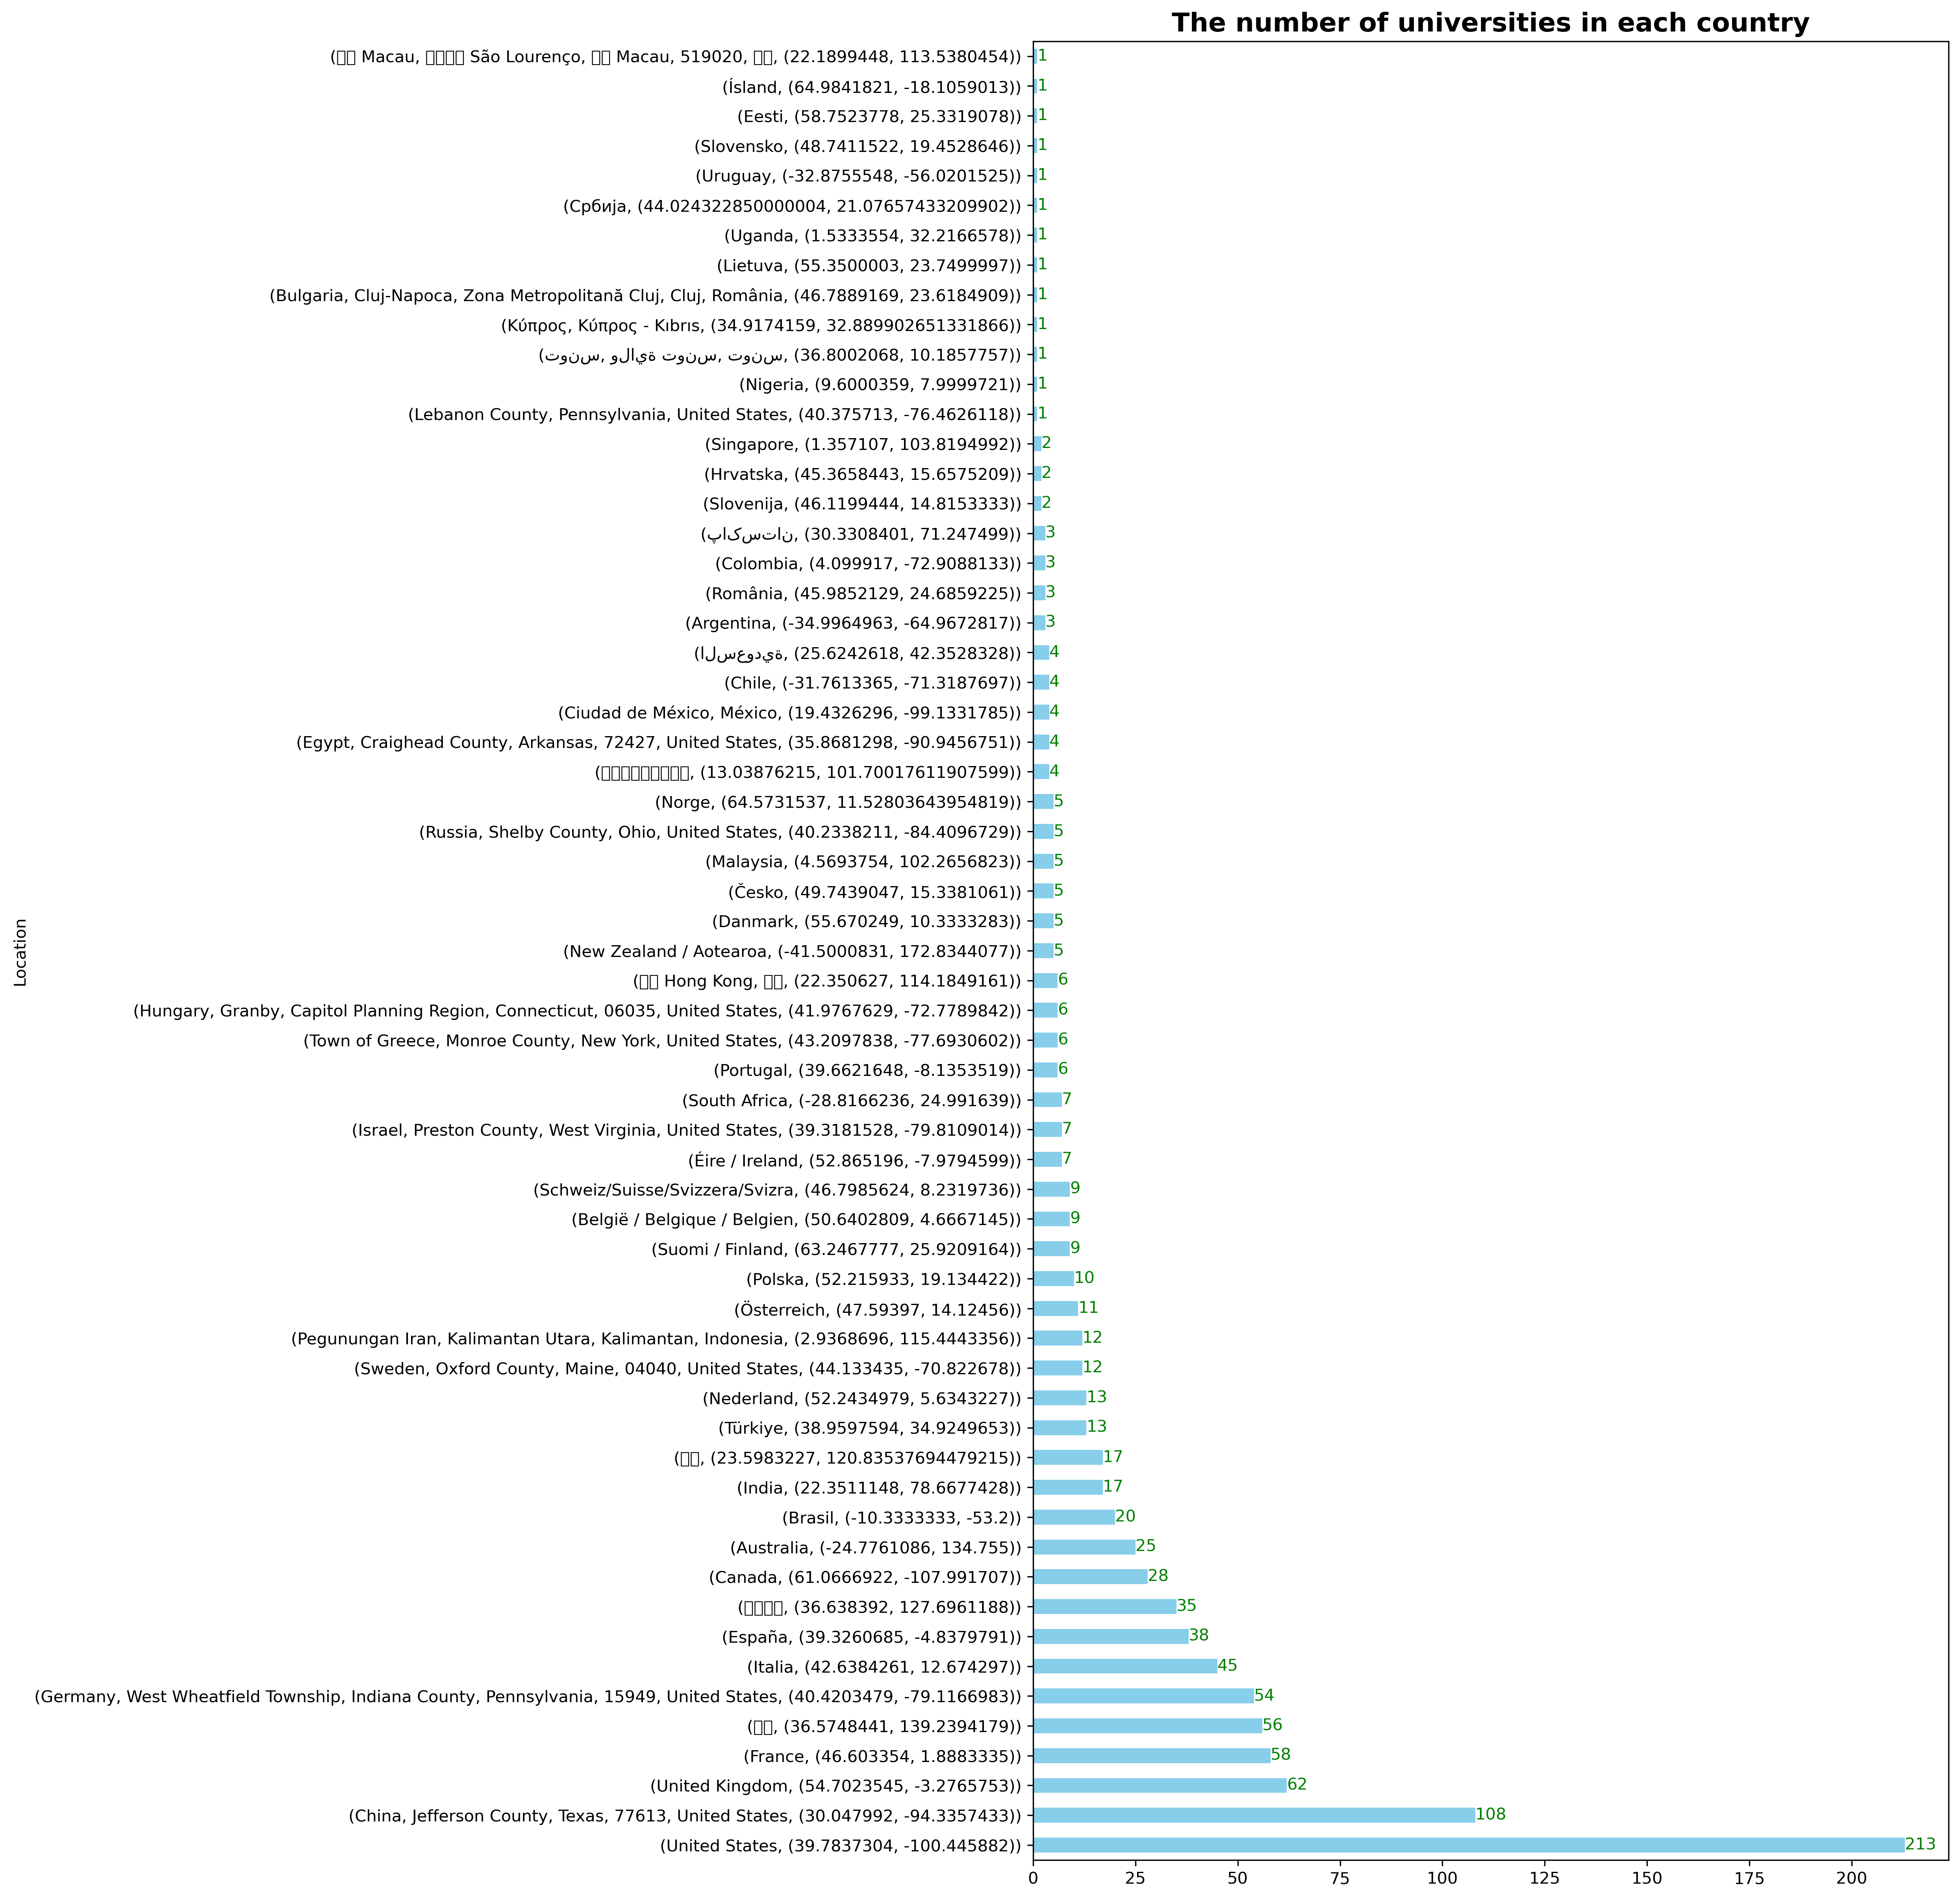

In [28]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,20), dpi=300)
df4['Location'].value_counts().plot.barh(ax=ax , color='skyblue')
plt.title('The number of universities in each country', fontsize=16, fontweight='bold')
ax.bar_label(ax.containers[0], color='green')
plt.savefig('my_plot.jpg', dpi=300)

plt.show()


According to this chart, among the top 1000 universities, America ranks first in the world with 213 universities, followed by China with 108 universities and then England with 62 universities in the second and third ranks.
Our country, Iran, is ranked 15th with 12 universities

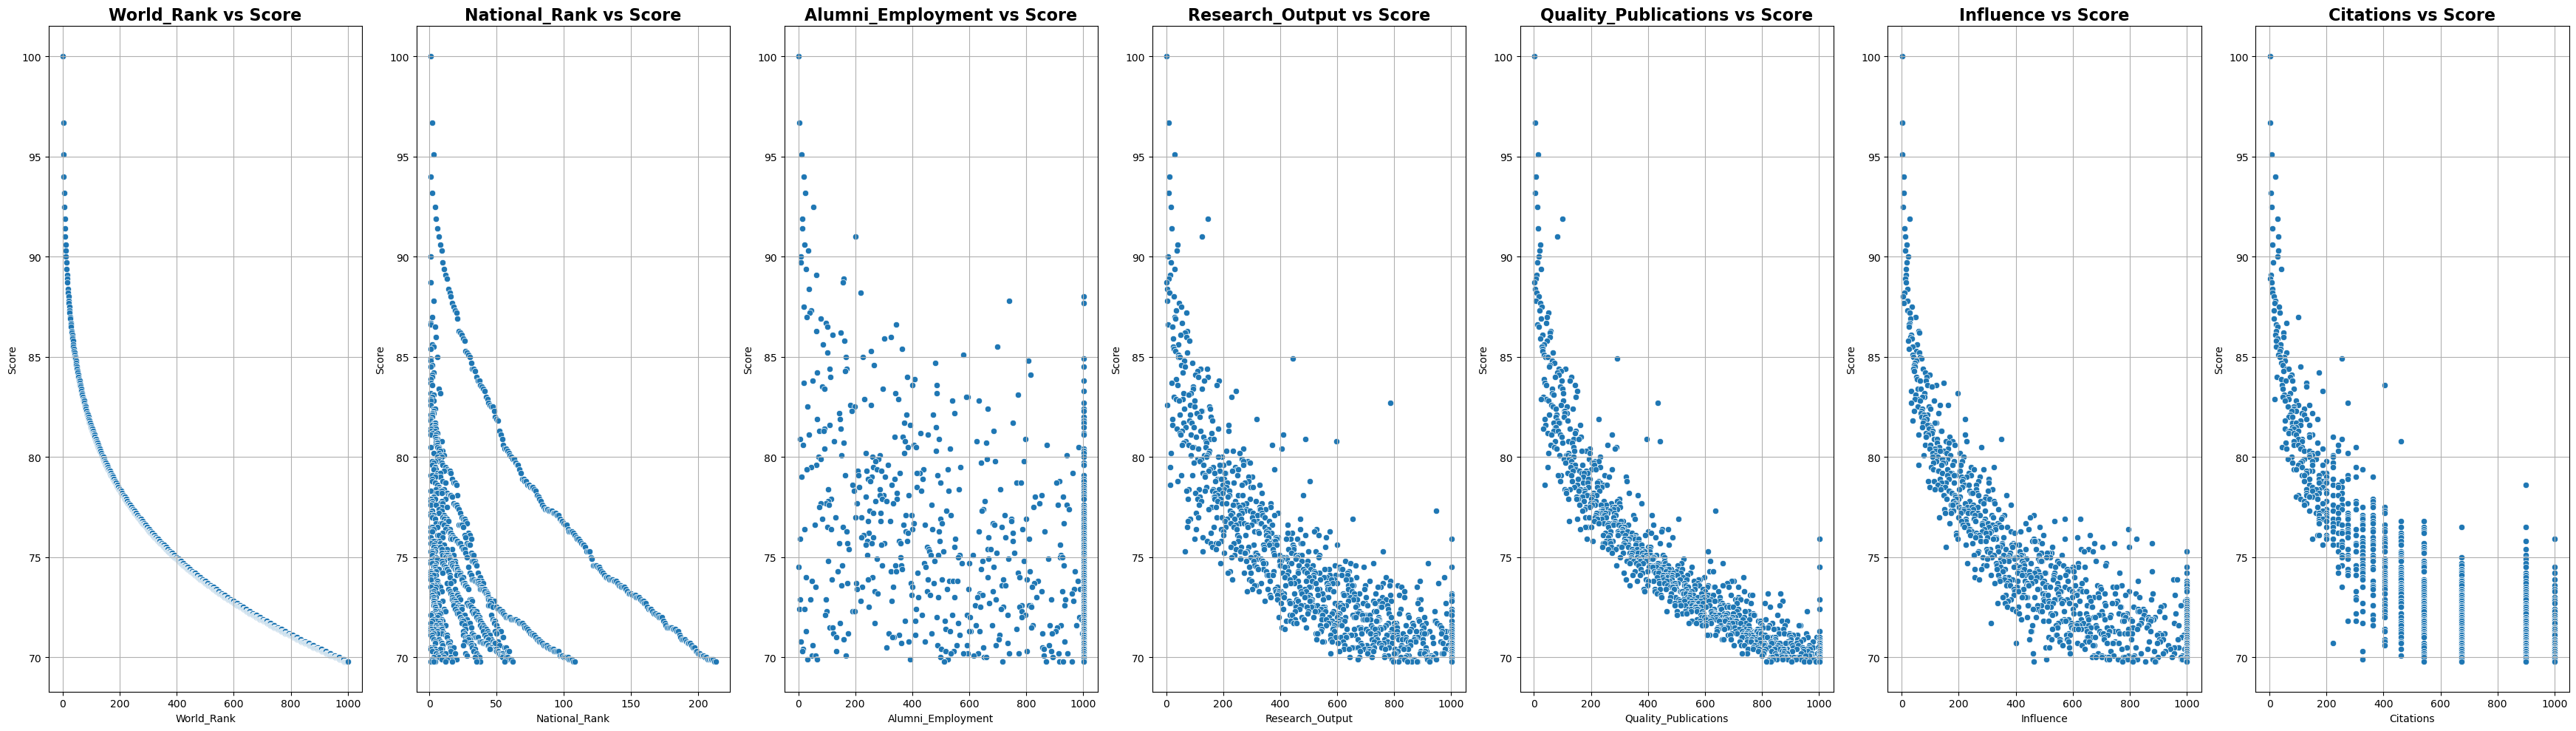

In [29]:
numeric_columns = df4.select_dtypes(['int64']).columns
num_plots = len(numeric_columns)

fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5*num_plots, 10))

for i, col in enumerate(numeric_columns):
    sns.scatterplot(data=df4, x=col, y='Score', ax=axes[i])
    axes[i].set_title(f'{col} vs Score', fontsize=16, fontweight='bold')
    axes[i].grid()
    
plt.savefig('my_plot.jpg')

plt.tight_layout()
plt.show()


 The characteristics of world rank, national rank, quality publications, influence, research output and citation are almost the same and have almost the same correlation with the score. But the characteristic of hiring graduates has a high dispersion and correlation with other characteristics and a low score.

In [30]:
# Get the number of universities in each continent

df_count = df4['Continent'].value_counts().reset_index()
df_count.columns = ['Continent', 'Count']

df_count['score'] = df4['Score']

fig = px.bar(df_count, y='Continent',text='Count', x='Count',color='score', orientation='h', title='Count of University in each Continent')

plt.savefig('my_plot.jpg')

fig.show()

<Figure size 640x480 with 0 Axes>

 According to this chart, most of the universities are located in Europe, followed by Asia and North America.

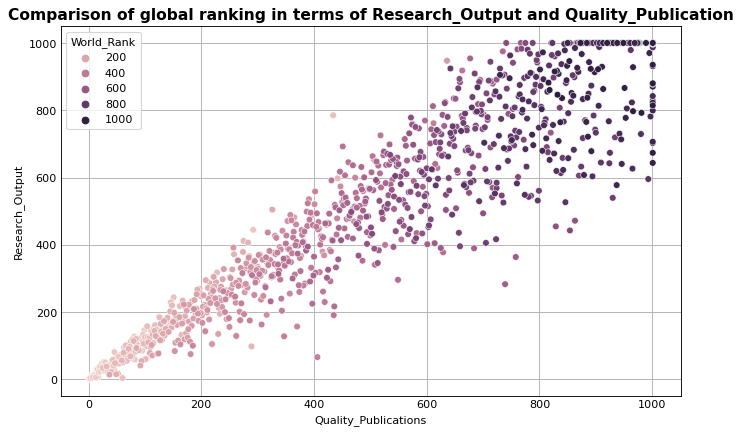

In [31]:
# draw 2d scatter plot for show Quality_Publications, Research_Output VS World_Rank

plt.figure(figsize=(10,6),dpi=80)
plt.style.use('_mpl-gallery')

sns.scatterplot(data=df4, x='Quality_Publications', y='Research_Output', hue='World_Rank')
plt.title('Comparison of global ranking in terms of Research_Output and Quality_Publication', fontsize=14, fontweight='bold')
plt.show()

According to this diagram, quality research output and quality publications have a linear relationship with each other, and with the increase of one, the other also increases, and in general, considering the high scatter diagrams, these characteristics have a completely opposite relationship with the score.

In [34]:
#Distribution of universities in the continents with a heatmap chart

geometry = gpd.points_from_xy(df4.Longitude, df4.Latitude)
geo_df = gpd.GeoDataFrame(
    df4, geometry=geometry)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]


map = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map

 According to the heatmap diagram, it can be seen that the density of universities in this dataset is higher in Europe than in other continents.

In [49]:
# Calculate the average geographic location of universities
avg_latitude = df4['Latitude'].mean()
avg_longitude = df4['Longitude'].mean()

# Build a map
m = folium.Map(location=[avg_latitude, avg_longitude], tiles="OpenStreetMap", zoom_start=2)

# for each university in the database
for index, row in df4.iterrows():
    # Determine the color based on the continentه
    if row['Continent'] == 'Africa':
        color = 'blue'
    elif row['Continent'] == 'Asia':
        color = 'green'
    elif row['Continent'] == 'Europe':
        color = 'red'
    elif row['Continent'] == 'North America':
        color = 'orange'
    elif row['Continent'] == 'South America':
        color = 'orange'    
    else:
        color = 'gray'
    
    # Add marker for each university with different colors by continent
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Institution'], icon=folium.Icon(color=color)).add_to(m)

m